# **Введение в Data Science**

## **Урок 5. Пайплайн исследования данных. Интерпретация моделей для бизнеса**

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. 

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Для этого необходимо:

1) провести исследовательский анализ данных,

2) визуализировать результаты и сделать из них выводы,

3) провести предобработку признаков (возможно создать новые),

4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,

5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,

6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

In [1]:
!pip freeze requiements.txt

- @ file:///tmp/build/80754af9/packaging_1611952188834/work
-.ckaging @ file:///tmp/build/80754af9/packaging_1611952188834/work
-ackaging @ file:///tmp/build/80754af9/packaging_1611952188834/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall

#### **1) Провести исследовательский анализ данных.**

In [2]:
# Импорт необходимых библиотек 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Загрузка данных в фрейм данных

LTV_data = pd.read_csv('LTV.csv')
LTV_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3688,SQ35375,Oregon,5054.334903,No,Basic,Doctor,2/20/11,Employed,F,22241,...,1,0,6,Personal Auto,Personal L3,Offer2,Web,343.159148,Four-Door Car,Medsize
7431,TX11163,Nevada,7380.570445,No,Basic,Bachelor,1/21/11,Employed,F,53957,...,80,0,1,Corporate Auto,Corporate L3,Offer1,Branch,61.554272,Luxury SUV,Medsize
1973,KM79894,Arizona,3095.175379,No,Extended,Master,1/21/11,Employed,M,88246,...,27,1,1,Corporate Auto,Corporate L3,Offer2,Agent,428.608683,Four-Door Car,Medsize
2029,DY30071,Oregon,5659.238384,No,Basic,Bachelor,1/7/11,Employed,M,69387,...,37,0,3,Personal Auto,Personal L3,Offer2,Agent,71.517444,Four-Door Car,Small
7536,LL55780,Oregon,6731.050335,No,Basic,High School or Below,1/25/11,Unemployed,F,0,...,5,0,2,Corporate Auto,Corporate L3,Offer4,Agent,446.400000,Four-Door Car,Medsize
6593,LC92080,Oregon,7247.736708,No,Basic,College,1/1/11,Employed,M,23541,...,38,0,2,Personal Auto,Personal L3,Offer2,Agent,98.923871,Two-Door Car,Medsize
6708,UI36374,Oregon,5470.060561,Yes,Extended,Bachelor,2/17/11,Employed,F,54507,...,11,0,1,Corporate Auto,Corporate L2,Offer2,Agent,702.990032,SUV,Medsize
6775,DH68319,Oregon,2787.501453,No,Basic,College,1/1/11,Employed,F,62506,...,90,0,1,Personal Auto,Personal L1,Offer1,Branch,331.200000,Two-Door Car,Large
7159,IQ96928,Oregon,4348.139173,No,Basic,High School or Below,2/27/11,Unemployed,F,0,...,9,0,7,Corporate Auto,Corporate L1,Offer1,Agent,675.661163,Four-Door Car,Small
6159,VB53090,California,8013.608606,No,Basic,Master,1/3/11,Employed,M,43196,...,71,0,2,Personal Auto,Personal L3,Offer4,Agent,1.489470,Four-Door Car,Medsize


In [4]:
# Названия столбцов

LTV_data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
# Размерность

LTV_data.shape

(9134, 24)

In [6]:
# Проверка типов данных

LTV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Словарь

LTV_data.dtypes.to_dict()

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Customer Lifetime Value': dtype('float64'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [8]:
# Выделение численных признаков от остальных

num_cols = []
str_cols = []

cols_and_type = LTV_data.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [9]:
# Вывод описательной статистики для каждого столбца

LTV_data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### **2) Визуализировать результаты и сделать из них выводы.**

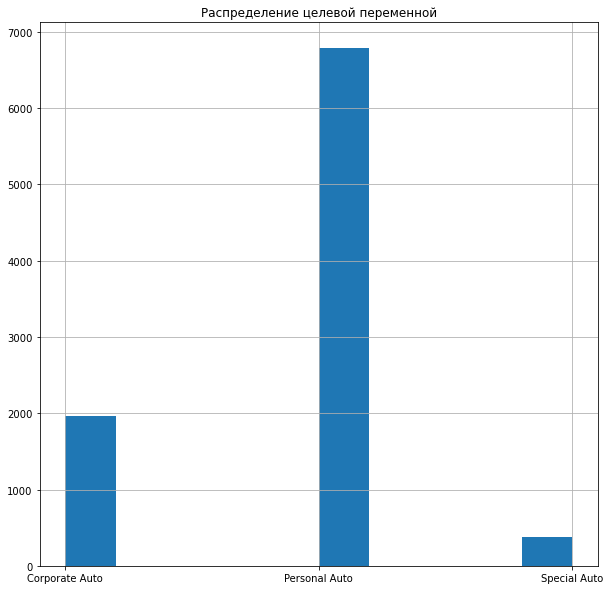

In [10]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
LTV_data['Policy Type'].hist()

plt.show()

##### **Вывод:**  

Данная выборка имеет неравномерное распределение.

- Больше всего пользователей предпочитают тип автомобильной страховки - Personal Auto. (*Больший спрос*)

- На втором месте идет - Corporate Auto.

- На третьем - Special Auto.

Т.е и большую прибыль компания получает от покупки пользователями (в группировке) автомобильной страховки - Personal Auto.

In [11]:
LTV_data_1 = LTV_data[['Policy Type','Customer Lifetime Value']].groupby(['Policy Type']).sum()
LTV_data_1

,Customer Lifetime Value
Policy Type,
Corporate Auto,1.537876e+07
Personal Auto,5.448974e+07
Special Auto,3.248625e+06


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

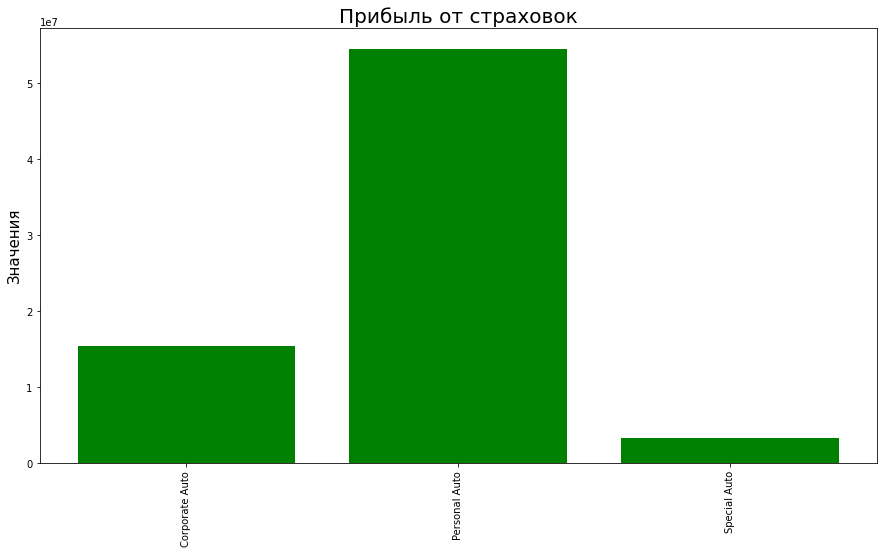

In [12]:
fig, ax = plt.subplots(figsize = (15, 8))
plt.bar(LTV_data_1.index, height = LTV_data_1['Customer Lifetime Value'], color = 'g')
ax.set_ylabel('Значения',fontsize = 15)
ax.set_title('Прибыль от страховок',fontsize = 20)
plt.xticks(rotation = 90)

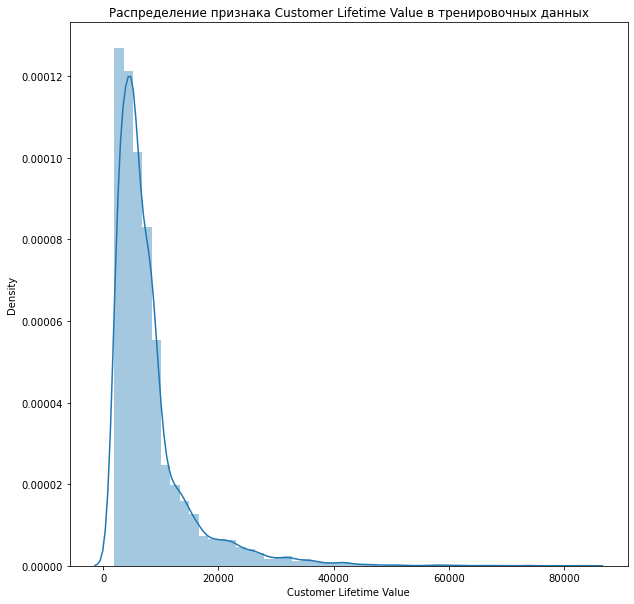

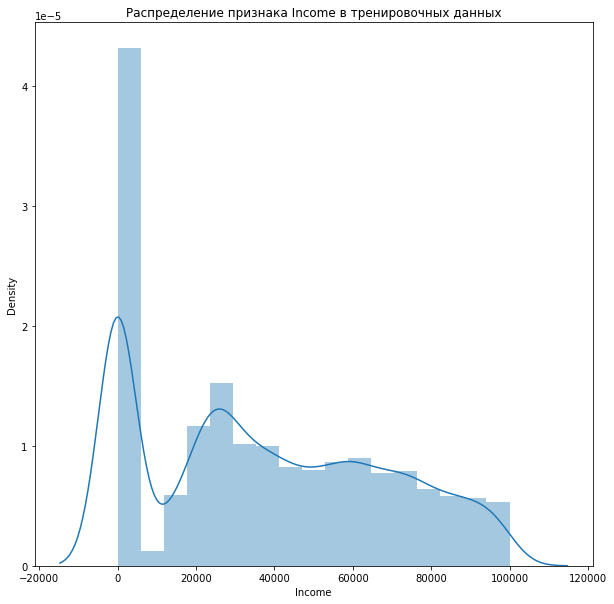

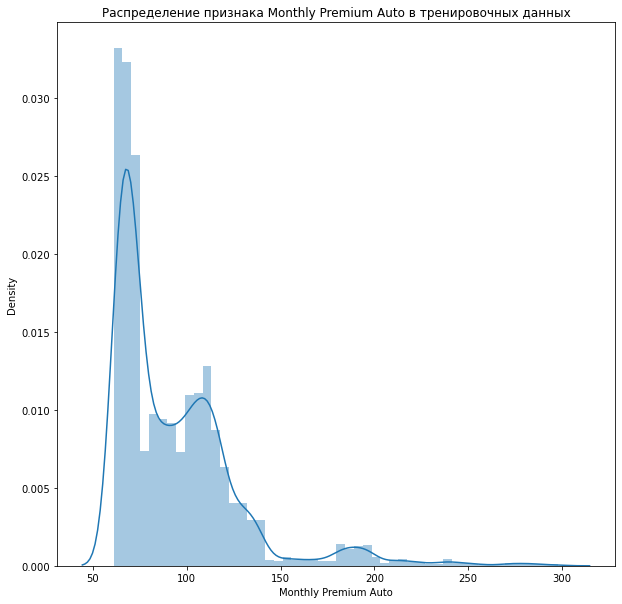

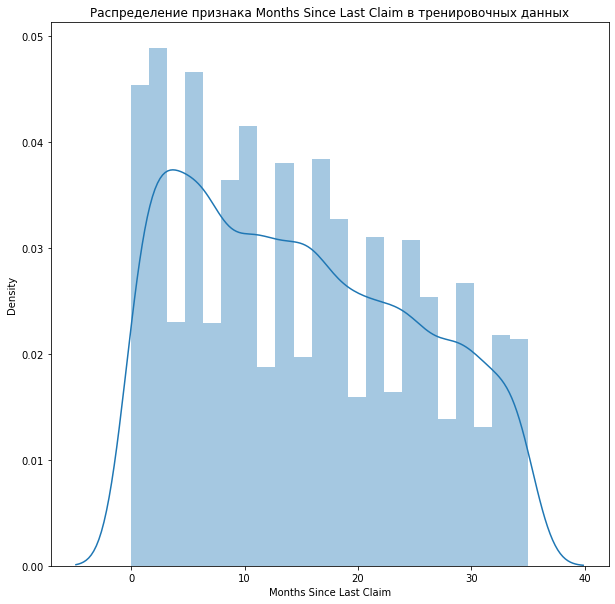

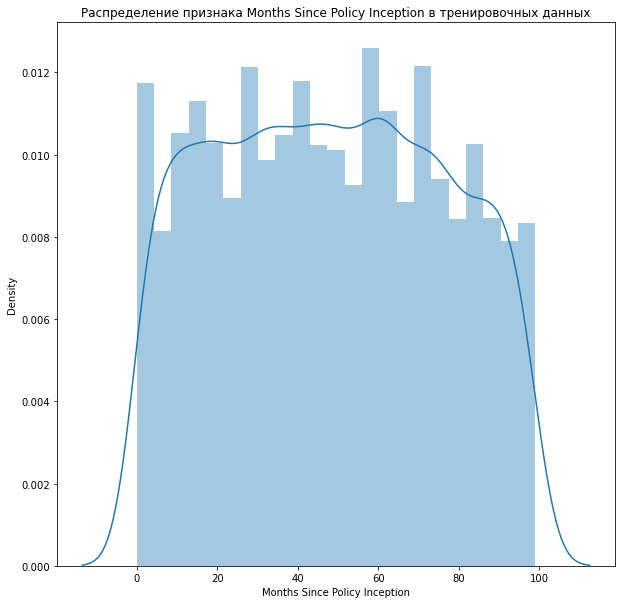

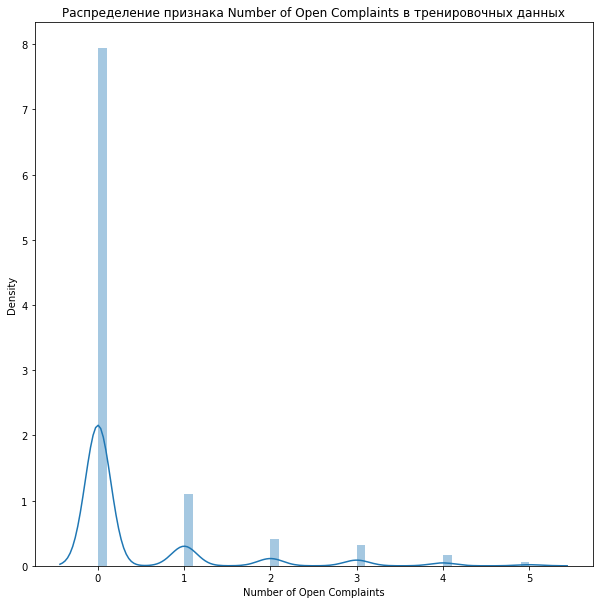

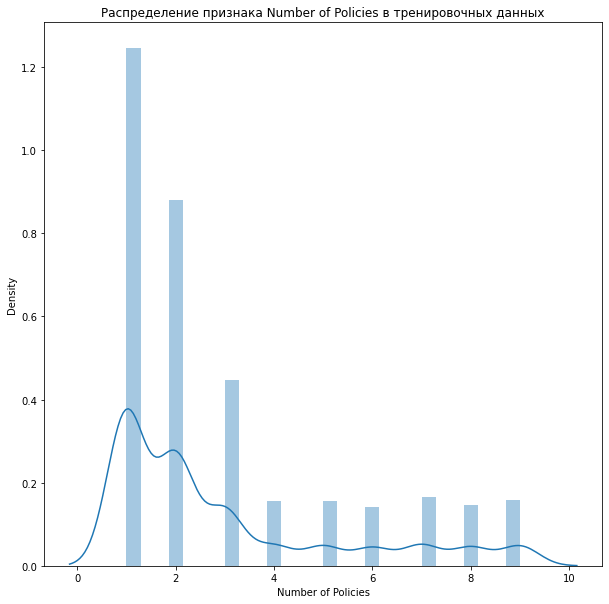

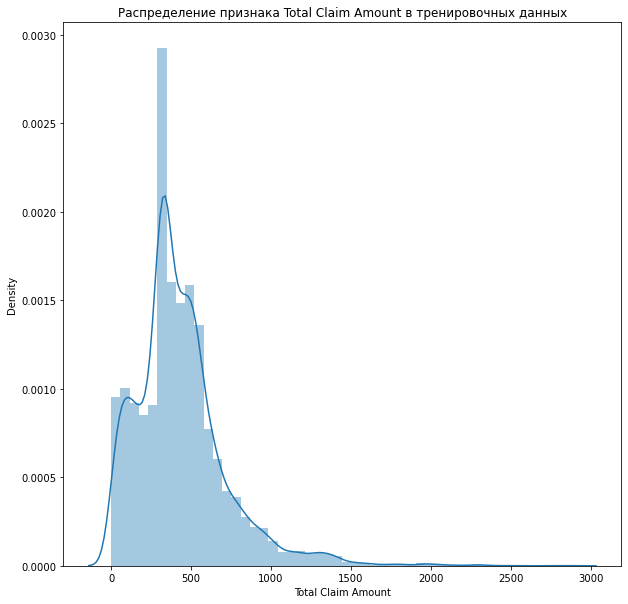

In [13]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(LTV_data[col])

##### **Вывод:**  

В целом какие - то гистограммы похожи на нормальные и логнормальные распределения.

- Распределение признака Customer Lifetime Value (LTV пользователя) - распределение логнормальное. 
Визуализируется максимальная прибыль от 0 до 20000.


- Распределение признака Income (Доход) - вызывающее распредление, много наблюдений, которые являются 0. 
Есть пользователи от который компания имеет 0 доход, таких пользователей достаточно много, и в среднем доход от 20000 до 100000 все таки имеется от пользователей.


- Распределение признака Months Since Last Claim (месяцев с последнего требования по выплате компенсации) - в целом нормальное распределение.


- Распределение признака Months Since Policy Inception (месяцев с открытия страховки) - также, в целом нормальное распределение.


- Распределение признака Number of Open Complaints ( количество незакрытых жалоб) - вызывающее распредление, много наблюдений, которые являются 0.
Жалобы поступившие от пользователей в основно равняются 0, т.е либо они они отсутствуют, либо они закрыты со стороны компании.


- Распределение признака Number of Policies (количество полисов) - близко к нормальному распредлению. 
Мы видим, что в большинстве случаев в среднем один пользователь имеет от 1 до 4 полисов, меньше пользователей от 5 до 9 полисов.


- Распределение признака Total Claim Amount (сумма выплаченных компенсаций) - похоже на нормальное распределение.

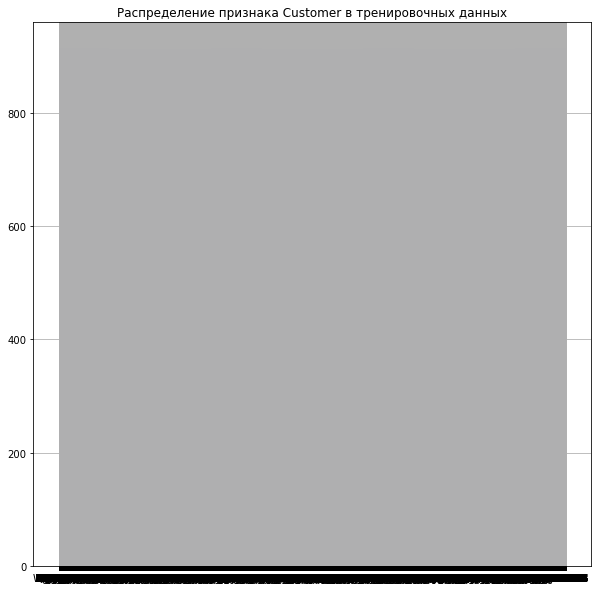

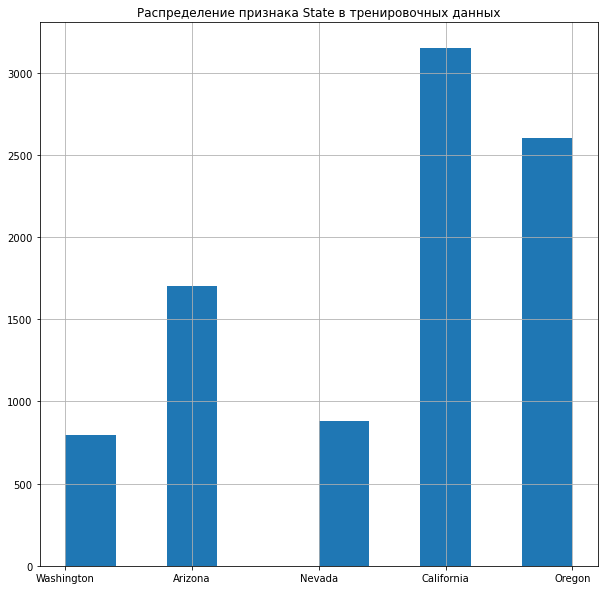

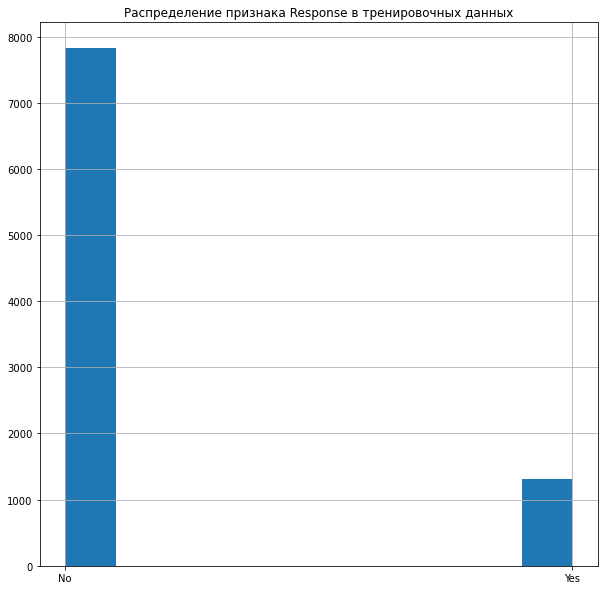

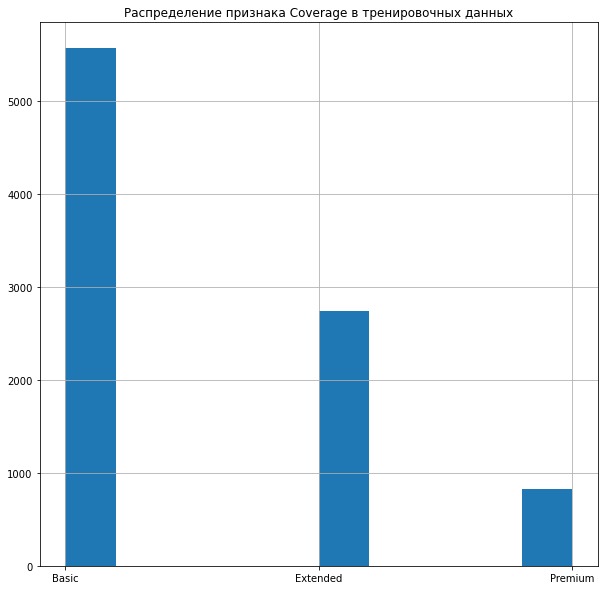

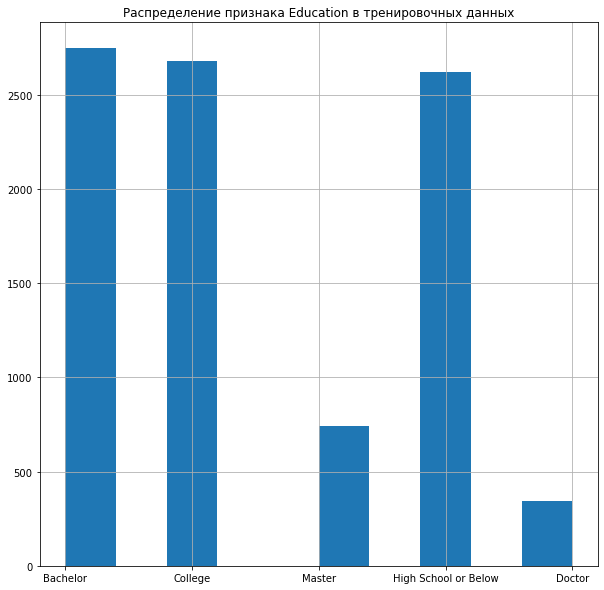

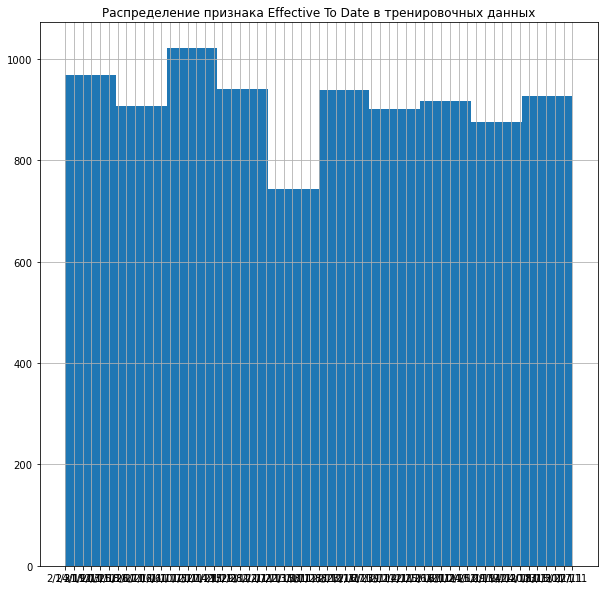

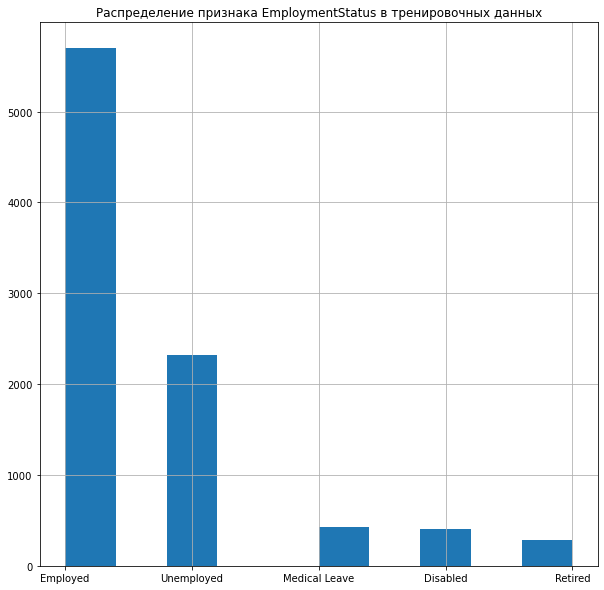

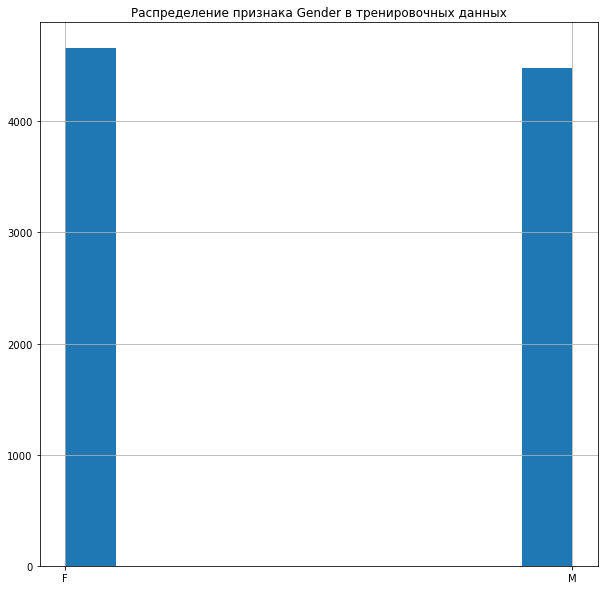

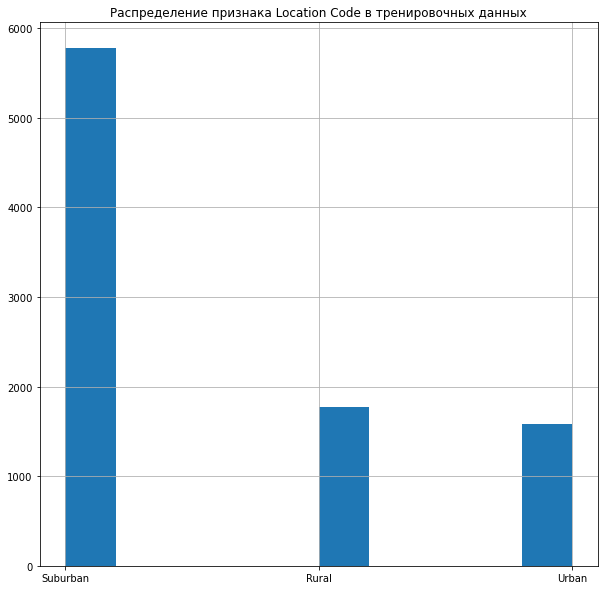

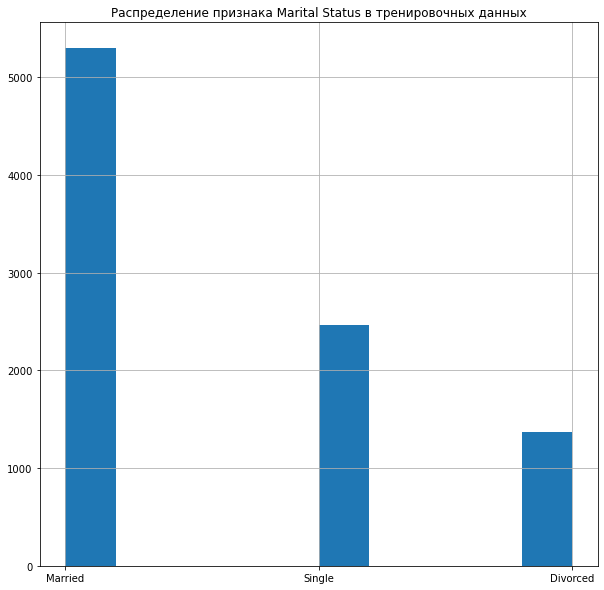

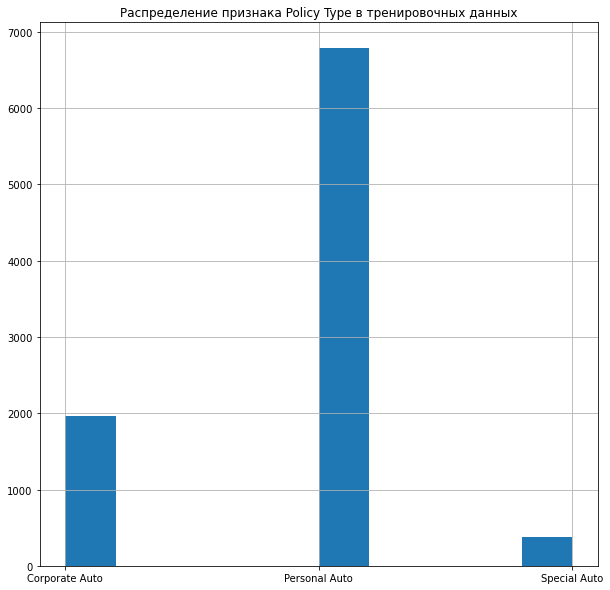

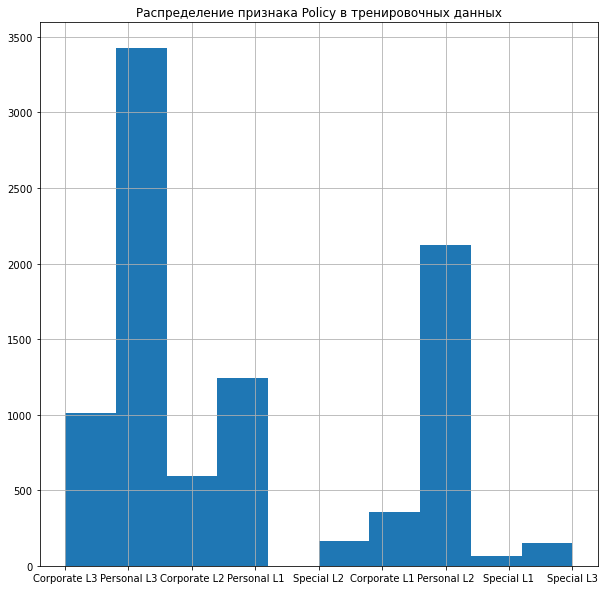

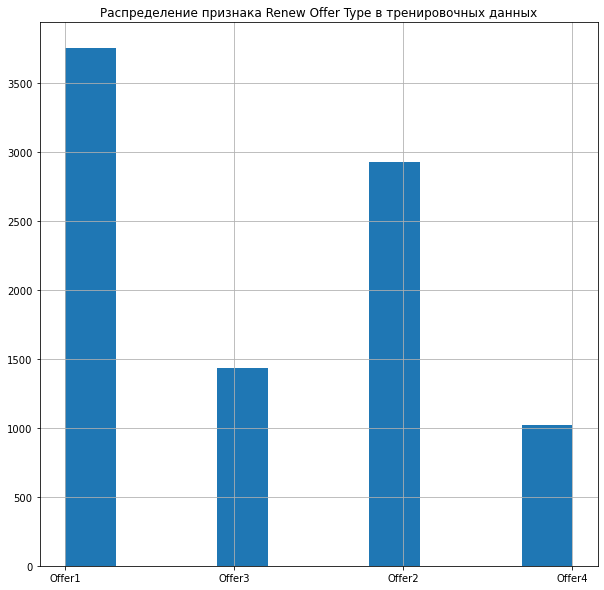

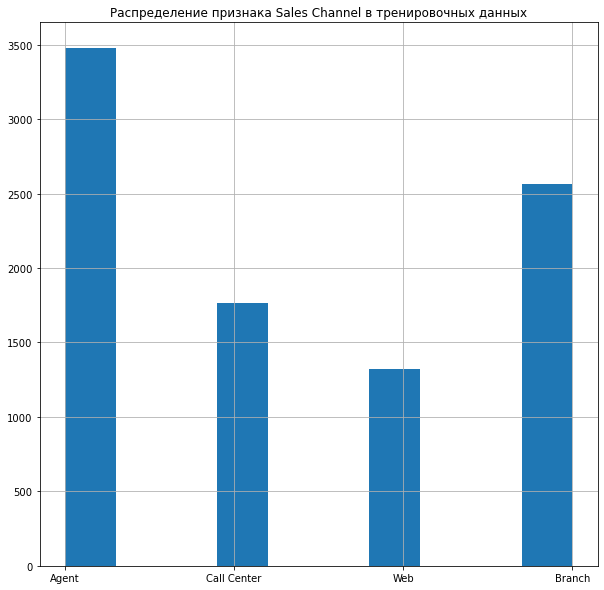

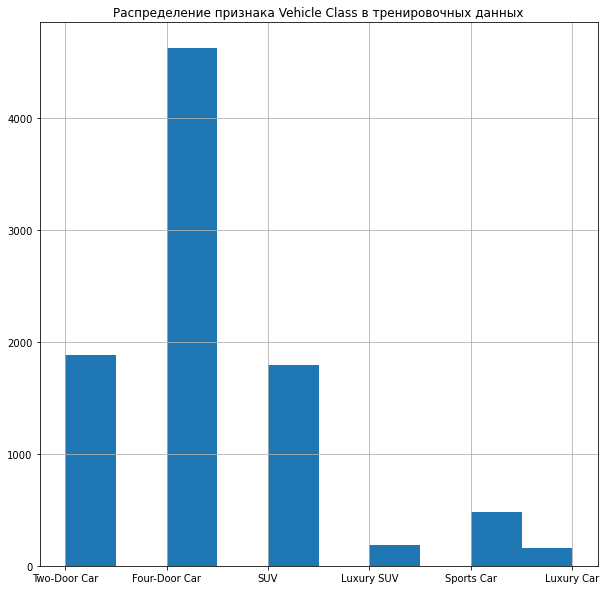

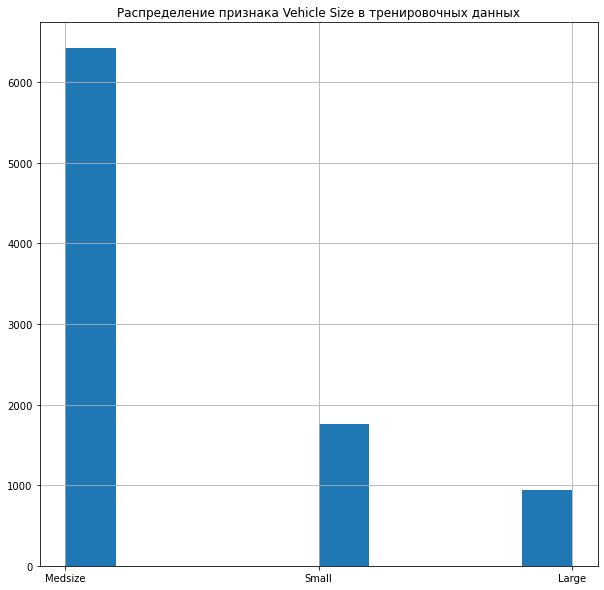

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    LTV_data[col].hist()

##### **Вывод:**  

В основном все графики показывают дисбаланс данных, но это стандартная ситуация, т.к данные не должны быть всегда одинаковыми, это и логично.

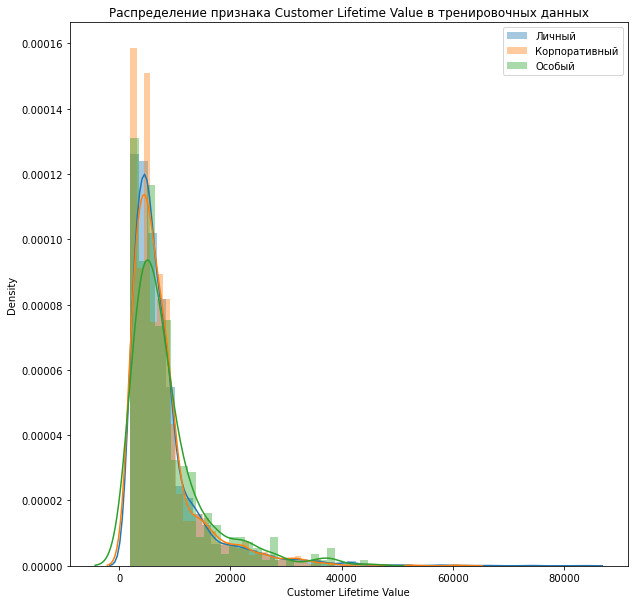

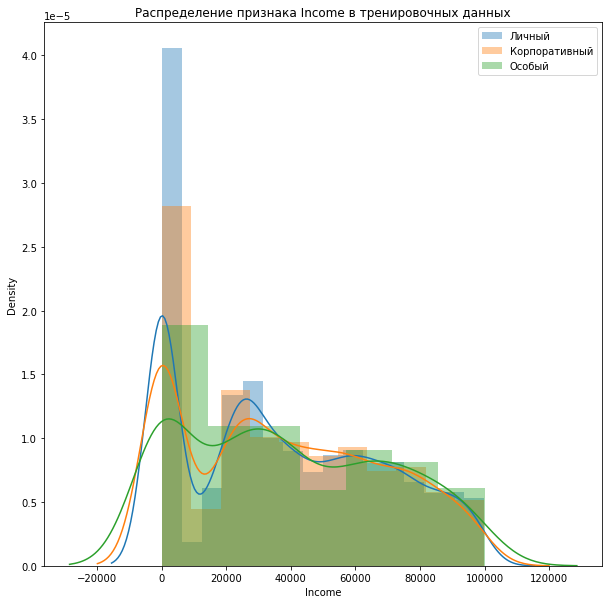

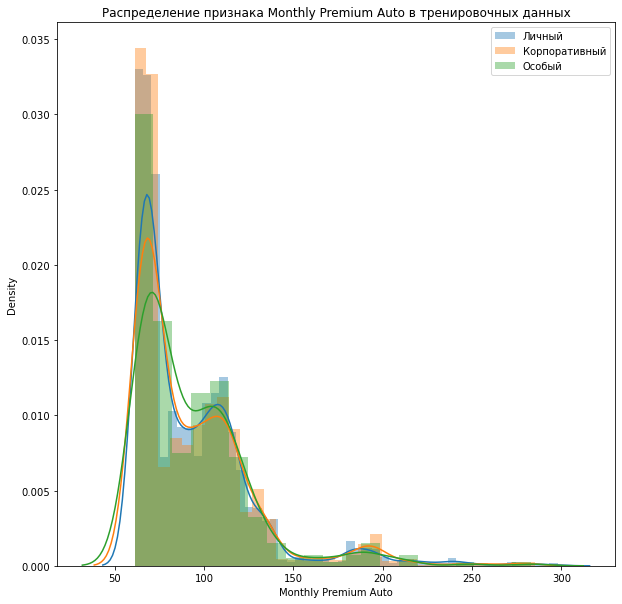

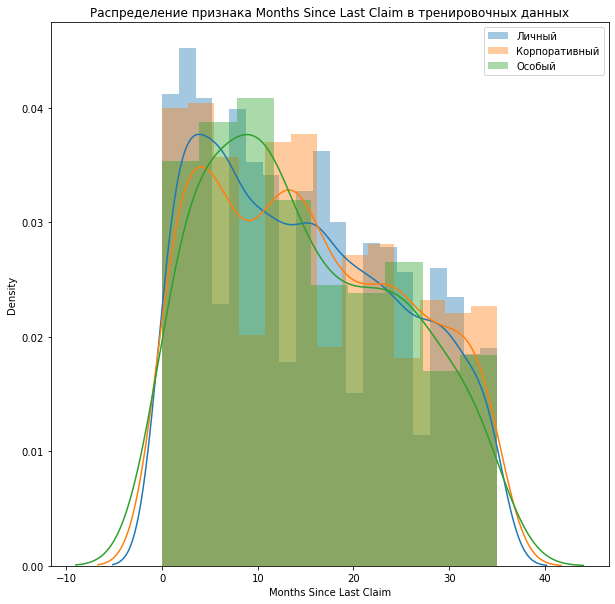

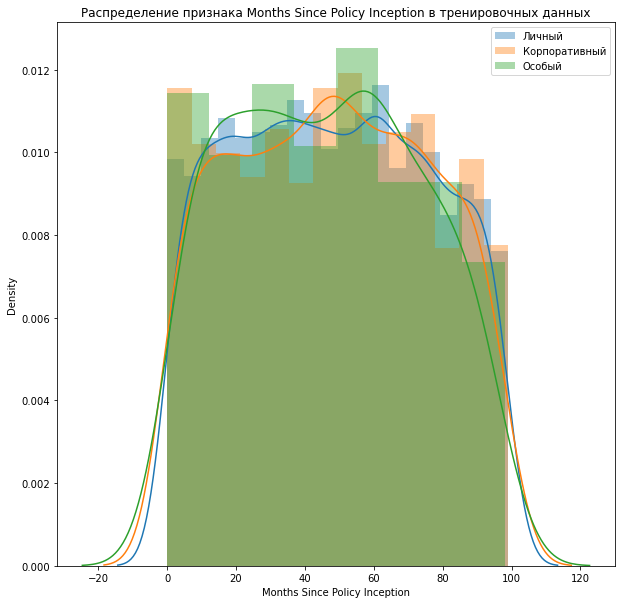

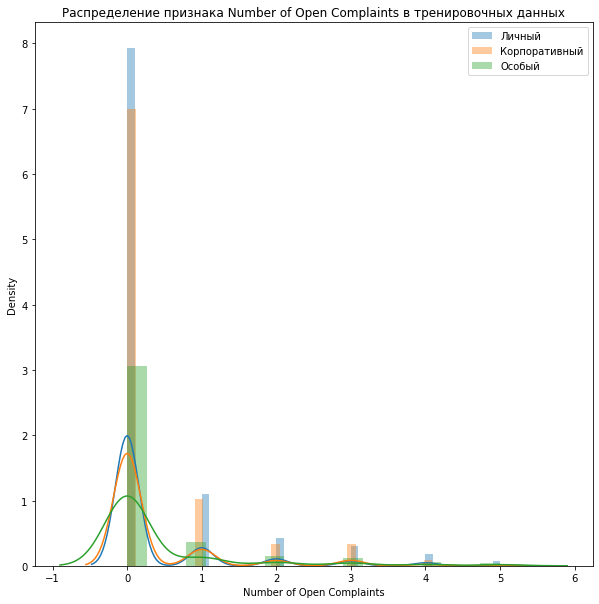

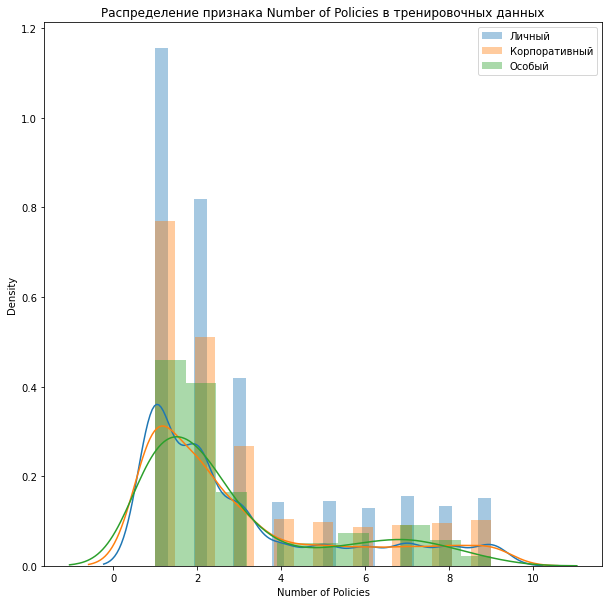

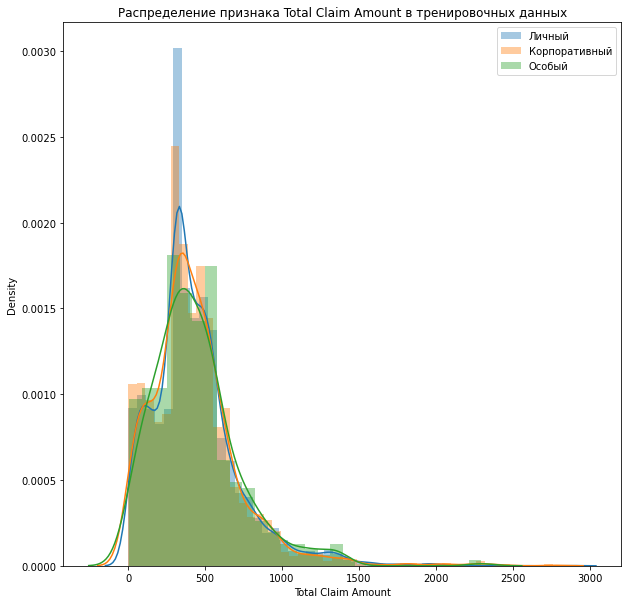

In [15]:
# Сравнить по типу страховки пользователя

Personal_Auto = LTV_data[LTV_data['Policy Type'] == 'Personal Auto']
Corporate_Auto = LTV_data[LTV_data['Policy Type'] == 'Corporate Auto']
Special_Auto = LTV_data[LTV_data['Policy Type'] == 'Special Auto']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(Personal_Auto[col], label = 'Личный')
    sns.distplot(Corporate_Auto[col], label = 'Корпоративный') 
    sns.distplot(Special_Auto[col], label = 'Особый') 
    plt.legend()

##### **Вывод:**  

Распределения однородны и похожи между собой.

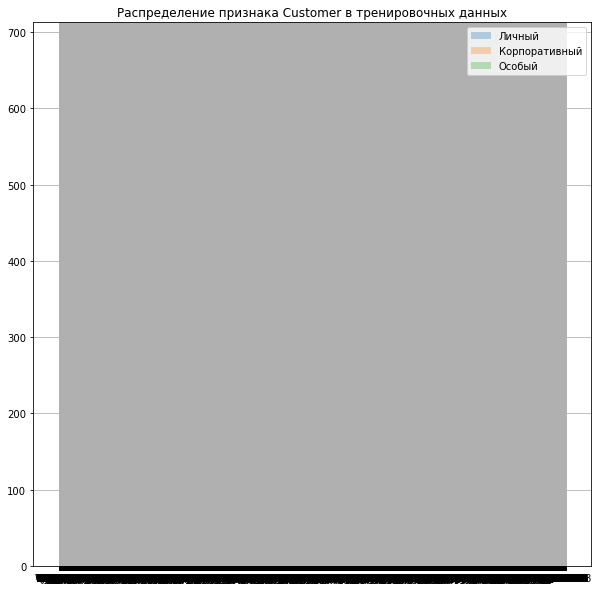

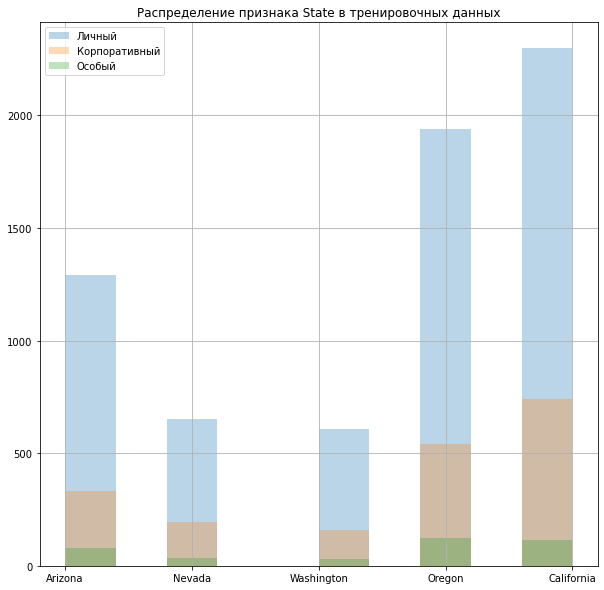

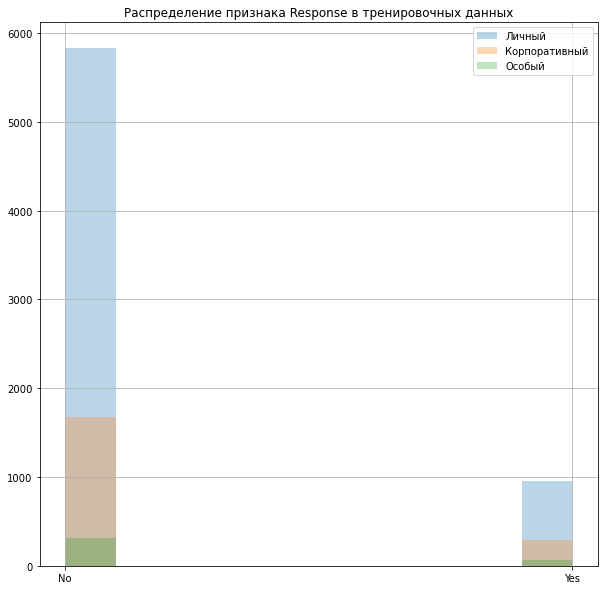

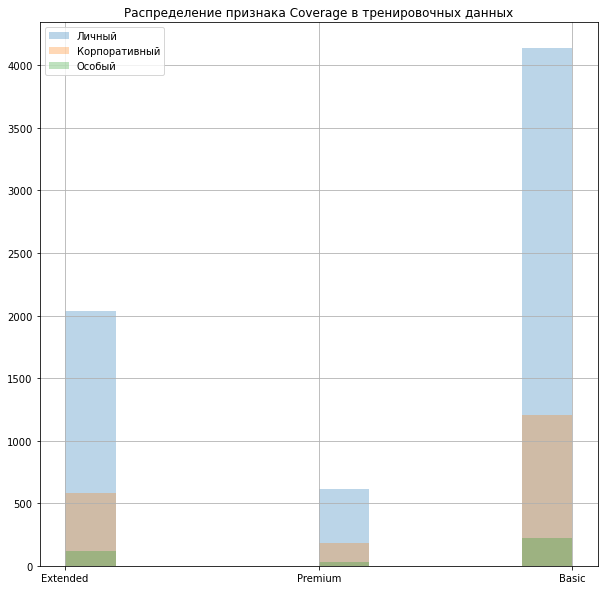

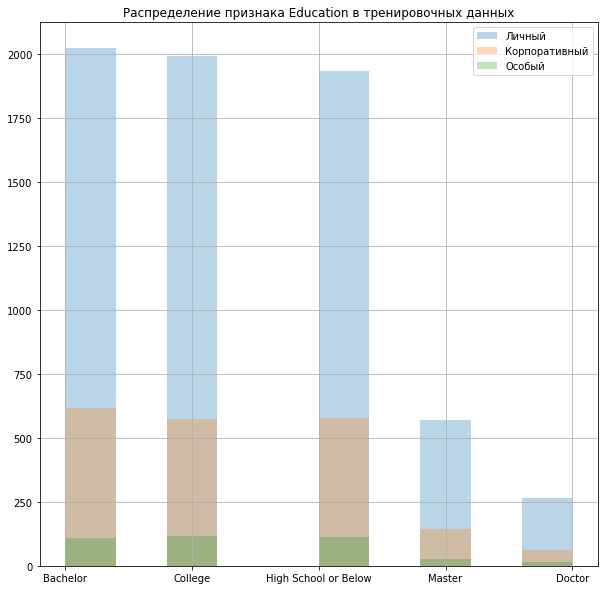

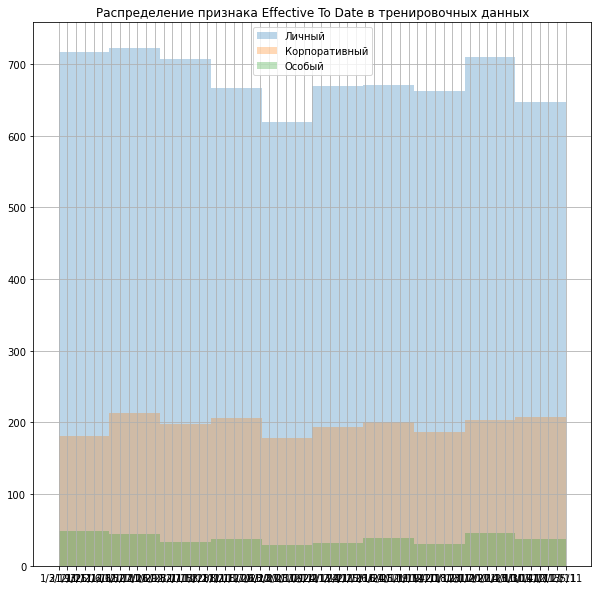

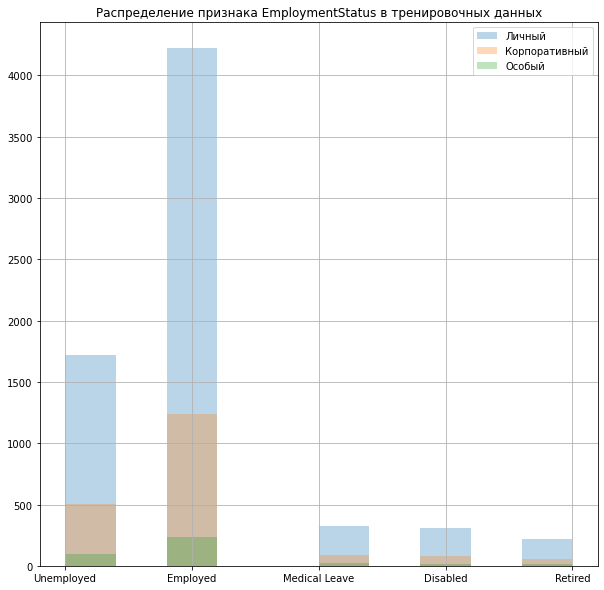

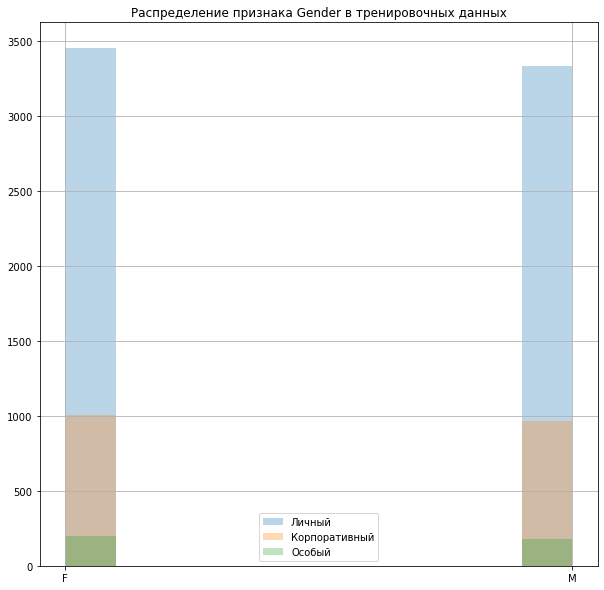

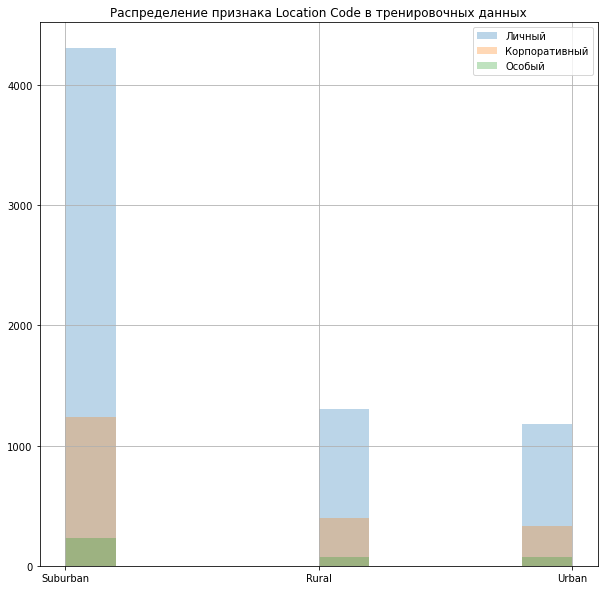

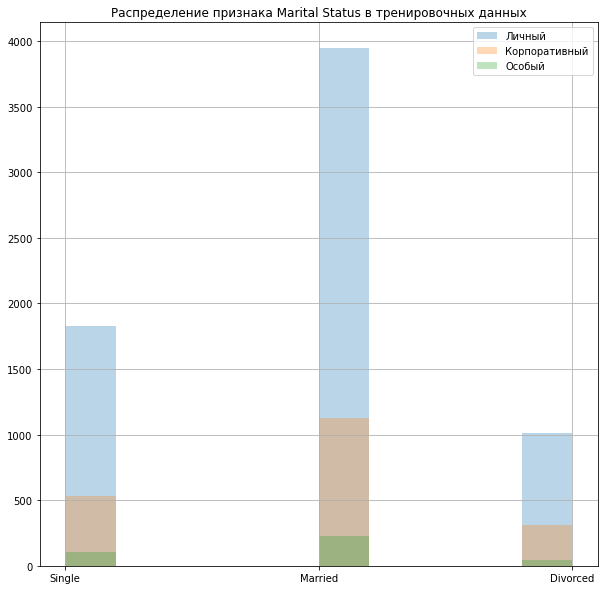

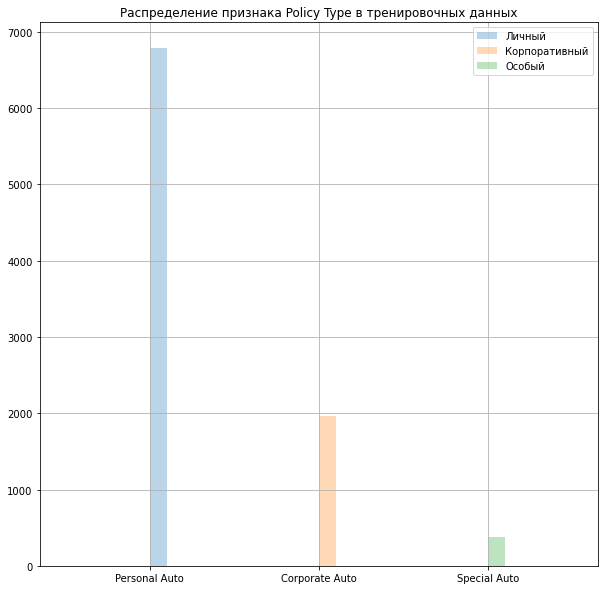

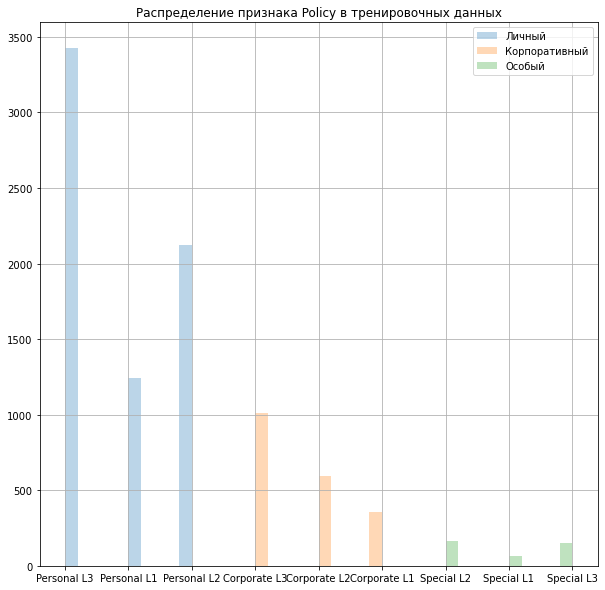

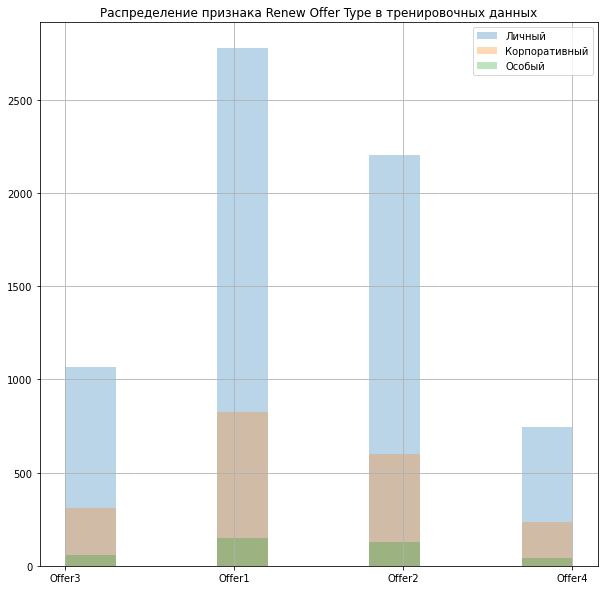

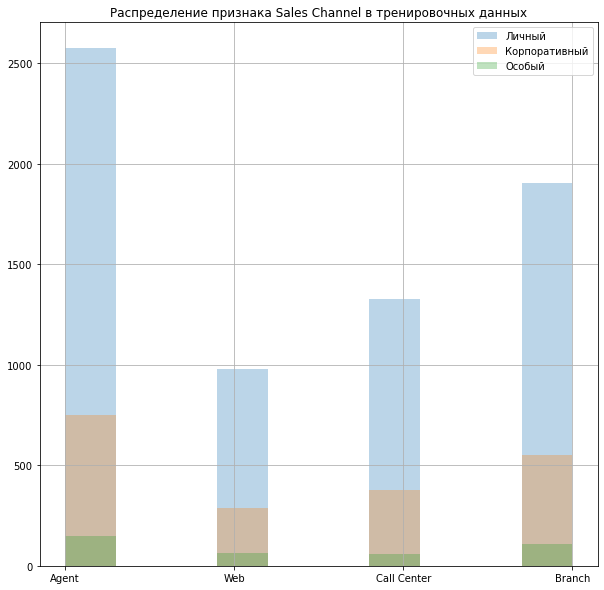

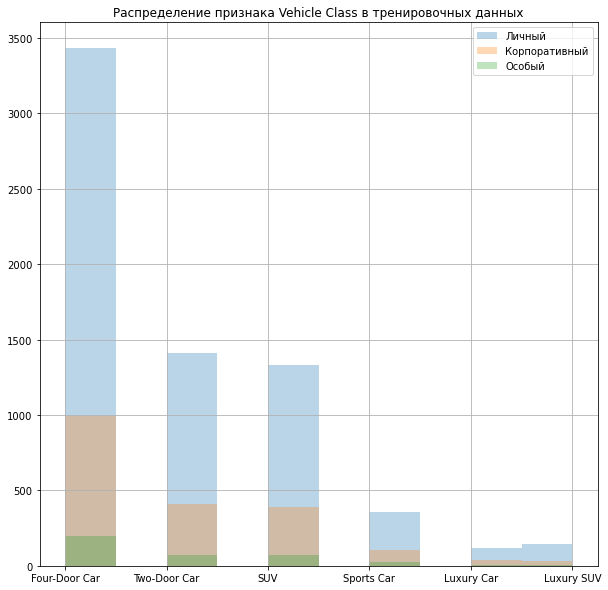

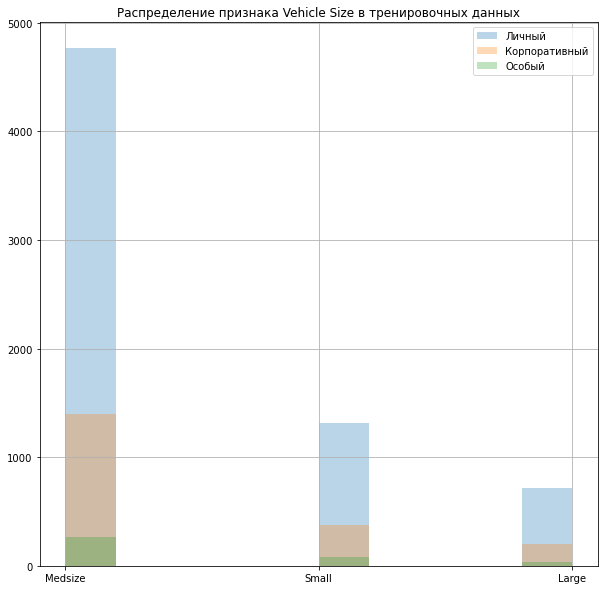

In [16]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    Personal_Auto[col].hist(label = 'Личный', alpha=0.3)
    Corporate_Auto[col].hist(label = 'Корпоративный', alpha = 0.3)   
    Special_Auto[col].hist(label = 'Особый', alpha = 0.3)  
    plt.legend()

##### **Вывод:**  

Соотношение в каждой области графиков сохраняется  и нет какаких - то явных закономерностей.

#### **3) Провести предобработку признаков (возможно создать новые).**

In [9]:
LTV_data = pd.read_csv('LTV.csv')
print(LTV_data.shape)

X = LTV_data.drop('Policy Type', axis = 1)
y = LTV_data['Policy Type']

(9134, 24)


In [10]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({"Policy Type" : ['Personal Auto', 'Corporate Auto', 'Special Auto']})
df

,Policy Type
0,Personal Auto
1,Corporate Auto
2,Special Auto


In [11]:
le = LabelEncoder()

le.fit_transform(df)

array([1, 0, 2])

In [13]:
from sklearn.preprocessing import LabelEncoder

num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    LTV_data[col] = le.fit_transform(LTV_data[col])

X.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2370,8372,3,15025.191260,0,1,0,17,1,0,35158,...,14,27,0,2,5,3,1,165.958605,0,1
1477,7731,3,4530.530663,0,0,1,13,1,1,34640,...,23,54,2,1,4,0,2,466.318191,4,1
5764,7008,1,7933.820656,0,0,1,4,1,0,76505,...,32,89,0,2,5,0,1,144.051716,0,1
6834,7407,3,4165.252177,0,2,0,12,1,1,58299,...,24,22,1,1,5,0,1,504.000000,0,1
7219,462,1,8278.716567,0,1,3,56,0,1,16924,...,23,69,0,1,4,0,1,1084.800000,2,1
3382,5259,4,9357.737821,0,2,3,4,1,0,33060,...,19,91,0,3,4,0,1,56.731578,0,1
9021,6117,1,6273.911874,1,1,1,38,3,0,18577,...,21,76,0,6,2,0,1,412.800000,0,1
917,1855,0,14024.358390,1,2,3,41,1,0,81872,...,10,55,0,2,6,1,3,256.438030,0,1
5229,8078,1,27069.496740,0,1,0,29,1,0,22955,...,6,23,3,2,5,2,1,441.600000,0,2
8341,2535,4,3226.790317,0,1,0,55,2,1,19948,...,17,84,0,1,4,0,1,427.200000,0,1


In [14]:
y = le.fit_transform(y)
y[:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 2])

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [16]:
# Корреляция признаков

LTV_data.corr()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,1.000000,0.011494,-0.028605,0.023256,-0.005677,0.004083,-0.003460,0.010265,0.018435,-0.008700,...,0.012043,-0.007422,-0.012298,0.007423,-0.016986,-0.006282,-0.008232,0.007607,-0.003413,0.000412
State,0.011494,1.000000,0.008778,-0.002473,0.002047,0.015755,-0.002864,0.000368,-0.004933,0.004620,...,0.002126,0.013965,-0.000021,-0.013866,0.014241,-0.007194,-0.003080,0.005495,0.011407,0.006846
Customer Lifetime Value,-0.028605,0.008778,1.000000,-0.008930,0.168040,0.026038,-0.012978,-0.034846,-0.013610,0.024366,...,0.011517,0.009418,-0.036343,0.021955,0.015217,-0.068548,-0.003941,0.226451,0.082307,0.017098
Response,0.023256,-0.002473,-0.008930,1.000000,0.000642,0.000285,-0.043133,-0.016703,0.004396,0.011932,...,-0.016597,0.002952,-0.009881,-0.020891,-0.001461,-0.162882,-0.086607,0.016877,0.021225,-0.050691
Coverage,-0.005677,0.002047,0.168040,0.000642,1.000000,0.021573,0.005482,0.003239,-0.014448,-0.010646,...,0.016925,0.010658,-0.007971,-0.013515,-0.002317,-0.049092,-0.024638,0.279078,-0.017682,-0.003775
Education,0.004083,0.015755,0.026038,0.000285,0.021573,1.000000,0.001276,-0.025271,0.002206,0.018709,...,0.003021,0.004140,-0.023270,0.007266,0.011119,0.067838,-0.005018,0.020730,0.010192,-0.005491
Effective To Date,-0.003460,-0.002864,-0.012978,-0.043133,0.005482,0.001276,1.000000,-0.002569,-0.013322,-0.000531,...,-0.003912,0.008281,-0.008880,0.006946,-0.006625,-0.001659,-0.010888,0.000806,-0.019002,0.005368
EmploymentStatus,0.010265,0.000368,-0.034846,-0.016703,0.003239,-0.025271,-0.002569,1.000000,0.034960,-0.726741,...,0.008197,0.015376,0.007045,0.005035,-0.001159,-0.121378,-0.018346,0.330465,-0.002443,-0.011253
Gender,0.018435,-0.004933,-0.013610,0.004396,-0.014448,0.002206,-0.013322,0.034960,1.000000,-0.015138,...,0.025522,0.004198,-0.003012,0.016258,-0.003123,0.045276,-0.020614,0.074564,0.020043,-0.000347
Income,-0.008700,0.004620,0.024366,0.011932,-0.010646,0.018709,-0.000531,-0.726741,-0.015138,1.000000,...,-0.026715,-0.000875,0.006408,-0.008656,0.005032,0.139856,0.013494,-0.355254,0.004343,0.007945


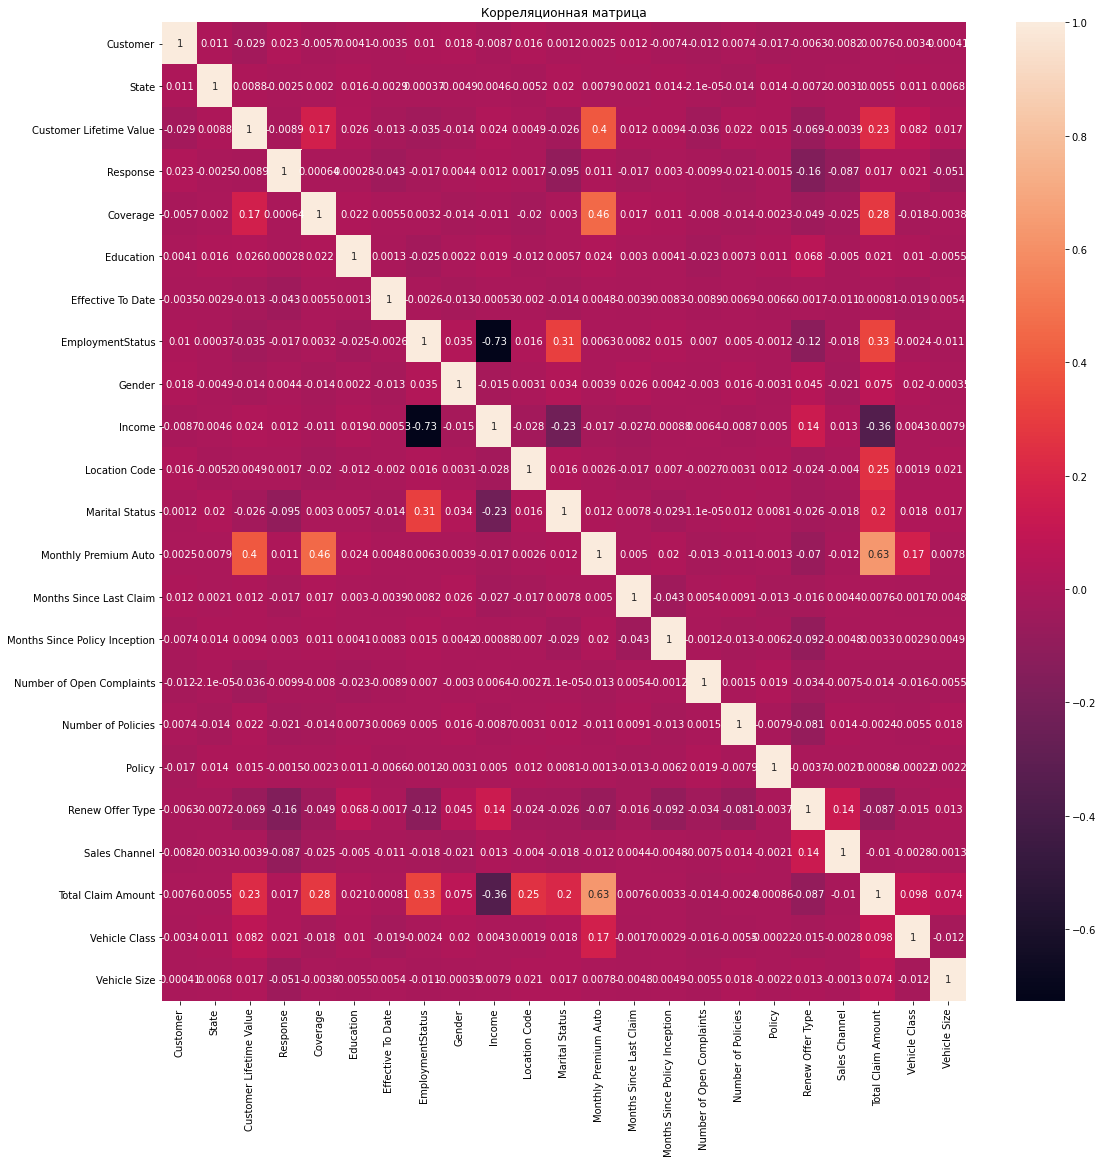

In [17]:
# Преобразуем матрицу признаков в DataFrame
LTV_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
LTV_data_trasformed['Policy Type'] = y
# Создаем корреляционную матрицу
LTV_data_corr = LTV_data.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(LTV_data_corr, annot = True)
plt.show()

#### **4) Обучить модели, и подобрать для каждой из них оптимальные гиперпараметры.**

Будем сравнивать между собой 3 модели: Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [18]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)
cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print(cv_log_reg['test_score'])
print("Результаты Логистической регрессии:", cv_log_reg['test_score'].mean())

[nan nan nan nan nan]
Результаты Логистической регрессии: nan


In [19]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры
cv_dec_tree = cross_validate(dec_tree,  X_sc, y, cv = 5, scoring = 'roc_auc')

print(cv_dec_tree['test_score'])
print("Результаты решающего дерева:", cv_dec_tree['test_score'].mean())

[nan nan nan nan nan]
Результаты решающего дерева: nan


In [20]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры
cv_ran_for = cross_validate(ran_for,  X_sc, y, cv = 5, scoring = 'roc_auc')

print(cv_ran_for['test_score'])
print("Результаты случайного леса:", cv_ran_for['test_score'].mean())

[nan nan nan nan nan]
Результаты случайного леса: nan


#### **5) Оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор.**

?

#### **6) Проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).**

In [59]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[ 1.54732566e-05 -5.78057354e-04 -8.96057512e-06 -1.57670944e-05
   1.23739187e-04 -6.11088845e-04 -2.40873895e-03 -7.82764774e-04
  -1.34227078e-04 -1.69148333e-06 -3.51259050e-04 -4.19910166e-04
   3.87691388e-03 -1.50722792e-03  6.02596745e-03 -3.08436713e-04
  -7.09257776e-04 -5.91503021e-03 -1.80183653e-02 -3.21177803e-04
  -3.45008160e-04 -4.59932301e-04 -1.51639558e-04 -2.89256182e-04]
 [ 3.38149768e-05  1.02263302e-03 -5.14138562e-06  1.89649042e-05
  -1.35968933e-04  1.00767121e-03  1.14079553e-02  1.61244782e-03
   2.80296815e-04 -7.33263751e-07  4.98528015e-04  6.90707195e-04
   9.03539893e-03  6.30063065e-03  5.93186582e-03  4.19870472e-04
   1.69358863e-03  4.60326716e-03  1.46077520e-02  5.95449100e-04
   7.01124946e-04 -6.37893810e-04  6.09757395e-04  5.40499917e-04]
 [-4.92882334e-05 -4.44575669e-04  1.41019607e-05 -3.19780986e-06
   1.22297459e-05 -3.96582362e-04 -8.99921639e-03 -8.29683041e-04
  -1.46069737e-04  2.42474707e-06 -1.47

In [60]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.80379053
 0.19620947 0.         0.         0.         0.         0.        ]


In [61]:
!pip install shap

In [62]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


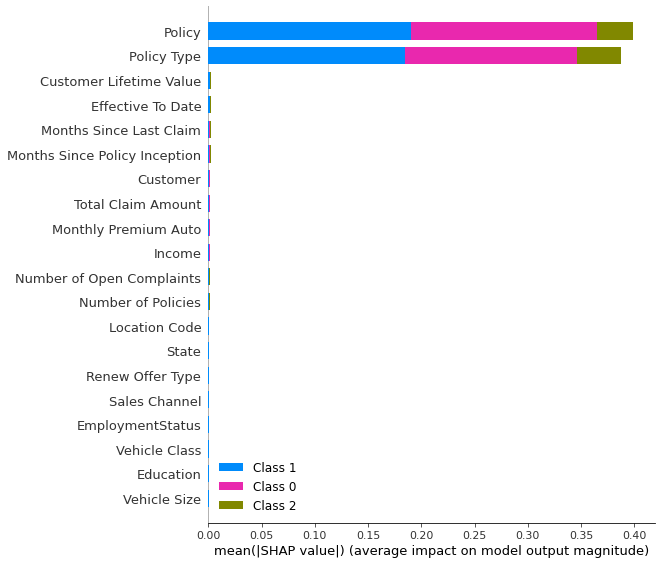

In [63]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")

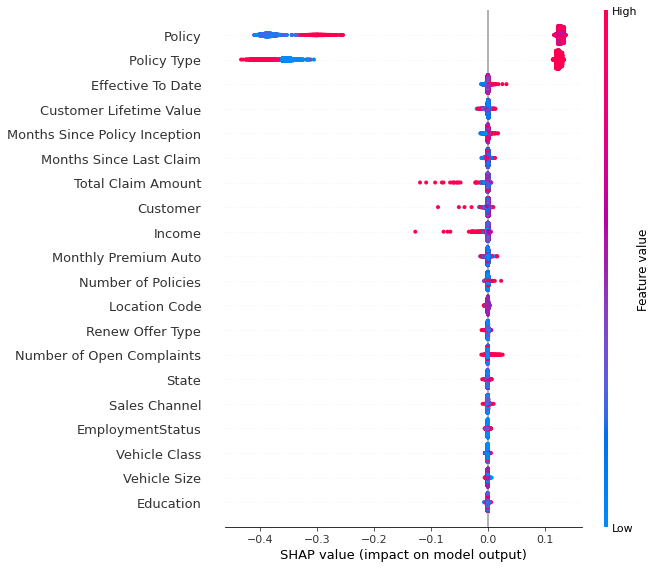

In [64]:
shap.summary_plot(shap_values[1], X)